In [1]:
# %% Imports
import jax
from jax import random, numpy as jnp
from flax import optim
from modax.models import DeepmodBayes
from modax.training import create_update
from modax.losses import *
from modax.logging import Logger
from modax.data.burgers import burgers
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
# Making dataset
key = random.PRNGKey(42)
data_key, network_key = random.split(key)

x = jnp.linspace(-3, 4, 100)
t = jnp.linspace(0.5, 5.0, 20)

t_grid, x_grid = jnp.meshgrid(t, x, indexing="ij")
u = burgers(x_grid, t_grid, 0.1, 1.0)

X_train = jnp.concatenate([t_grid.reshape(-1, 1), x_grid.reshape(-1, 1)], axis=1)
y_train = u.reshape(-1, 1)
noise = 0.1
y_train += noise * jnp.std(y_train) * jax.random.normal(data_key, shape=y_train.shape)

In [89]:
# Instantiating model and optimizers
model = DeepmodBayes(features=[50, 50, 1])

params = model.init(network_key, X_train)
optimizer = optim.Adam(learning_rate=2e-3, beta1=0.99, beta2=0.99)
optimizer = optimizer.create(params)

In [90]:
# Compiling train step
update = create_update(loss_fn_mse_bayes, model=model, x=X_train, y=y_train)
_ = update(optimizer)  # triggering compilation

In [91]:
# Running to convergence
max_epochs = 20001
logger = Logger(comment='bayes_mse')
for epoch in jnp.arange(max_epochs):
    optimizer, metrics = update(optimizer)
    if epoch % 1000 == 0:
        print(f"Loss step {epoch}: {metrics['loss']}")
    if epoch % 100 == 0:
        logger.write(metrics, epoch)
logger.close()

Loss step 0: 2229.12646484375
Loss step 1000: -158.70819091796875
Loss step 2000: -2143.58642578125
Loss step 3000: -4030.03271484375
Loss step 4000: -5200.7578125
Loss step 5000: -5215.5712890625
Loss step 6000: -5222.4560546875
Loss step 7000: -5227.3759765625
Loss step 8000: -5231.65673828125
Loss step 9000: -5234.751953125
Loss step 10000: -5236.69091796875
Loss step 11000: -5239.78515625
Loss step 12000: -5241.943359375
Loss step 13000: -5245.2919921875
Loss step 14000: -5247.9912109375
Loss step 15000: -5250.3349609375
Loss step 16000: -5252.9736328125
Loss step 17000: -5255.4697265625
Loss step 18000: -5257.8818359375
Loss step 19000: -5261.3876953125
Loss step 20000: -5265.3642578125


In [92]:
prediction, dt, theta, coeffs, s, t = model.apply(optimizer.target, X_train)
print(coeffs * jnp.linalg.norm(theta, axis=0, keepdims=True).T)

[[ 0.74379313]
 [-3.457244  ]
 [ 4.345568  ]
 [ 2.6174734 ]
 [-0.48236308]
 [-2.2401612 ]
 [-1.3107225 ]
 [-0.21278201]
 [-0.585649  ]
 [-1.4443657 ]
 [ 2.2036114 ]
 [ 0.2650216 ]]


In [94]:
# Instantiating model and optimizers
model = DeepmodBayes(features=[50, 50, 1])

params = model.init(network_key, X_train)
optimizer = optim.Adam(learning_rate=2e-3, beta1=0.99, beta2=0.99)
optimizer = optimizer.create(params)

In [95]:
# Compiling train step
update = create_update(loss_fn_multitask, model=model, x=X_train, y=y_train)
_ = update(optimizer)  # triggering compilation

In [96]:
# Running to convergence
max_epochs = 100001
logger = Logger(comment='multitask')
for epoch in jnp.arange(max_epochs):
    optimizer, metrics = update(optimizer)
    if epoch % 1000 == 0:
        print(f"Loss step {epoch}: {metrics['loss']}")
    if epoch % 100 == 0:
        logger.write(metrics, epoch)
logger.close()

Loss step 0: 4069.3486328125
Loss step 1000: -320.46063232421875
Loss step 2000: -4305.1357421875
Loss step 3000: -8186.4013671875
Loss step 4000: -11310.7470703125
Loss step 5000: -13301.9482421875
Loss step 6000: -15284.5419921875
Loss step 7000: -17221.7890625
Loss step 8000: -18867.189453125
Loss step 9000: -19273.6796875
Loss step 10000: -19144.427734375
Loss step 11000: -19401.65625
Loss step 12000: -19316.078125
Loss step 13000: -19994.478515625
Loss step 14000: -19827.263671875
Loss step 15000: -19920.486328125
Loss step 16000: -19839.603515625
Loss step 17000: -19822.388671875
Loss step 18000: -20344.5859375
Loss step 19000: -20490.58203125
Loss step 20000: -20648.03125
Loss step 21000: -20795.6015625
Loss step 22000: -20240.732421875
Loss step 23000: -20435.3984375
Loss step 24000: -20258.609375
Loss step 25000: -20068.8125
Loss step 26000: -20798.93359375
Loss step 27000: -20836.216796875
Loss step 28000: -20201.09375
Loss step 29000: -21198.42578125
Loss step 30000: -20881.

In [109]:
# Instantiating model and optimizers
model = DeepmodBayes(features=[50, 50, 1])

params = model.init(network_key, X_train)
optimizer = optim.Adam(learning_rate=2e-3, beta1=0.99, beta2=0.99)
optimizer = optimizer.create(params)

In [110]:
# Compiling train step
update = create_update(loss_fn_pinn_bayes, model=model, x=X_train, y=y_train)
_ = update(optimizer)  # triggering compilation

In [111]:
# Running to convergence
max_epochs = 100001
logger = Logger(comment='bayes_pinn')
for epoch in jnp.arange(max_epochs):
    optimizer, metrics = update(optimizer)
    if epoch % 1000 == 0:
        print(f"Loss step {epoch}: {metrics['loss']}")
    if epoch % 100 == 0:
        logger.write(metrics, epoch)
logger.close()

Loss step 0: 12277.25390625
Loss step 1000: 5890.10205078125
Loss step 2000: -87.94482421875
Loss step 3000: -5932.18359375
Loss step 4000: -10796.4482421875
Loss step 5000: -12891.76171875
Loss step 6000: -12894.53515625
Loss step 7000: -12895.2587890625
Loss step 8000: -12896.43359375
Loss step 9000: -12896.591796875
Loss step 10000: -12896.32421875
Loss step 11000: -12897.212890625
Loss step 12000: -12897.65625
Loss step 13000: -12897.705078125
Loss step 14000: -12897.658203125
Loss step 15000: -12897.888671875
Loss step 16000: -12897.7646484375
Loss step 17000: -12898.365234375
Loss step 18000: -12898.048828125
Loss step 19000: -12898.619140625
Loss step 20000: -12898.447265625
Loss step 21000: -12898.5869140625
Loss step 22000: -12898.1171875
Loss step 23000: -12898.3515625
Loss step 24000: -12898.908203125
Loss step 25000: -12898.98046875
Loss step 26000: -12898.939453125
Loss step 27000: -12899.021484375
Loss step 28000: -12899.13671875
Loss step 29000: -12899.240234375
Loss ste

KeyboardInterrupt: 

In [17]:
from jax.scipy.stats import gamma

In [16]:
prior = 

NameError: name 'gamma' is not defined

In [38]:
n_samples = 1000
k = n_samples / 2
theta = (n_samples / 2 * 1e-2)

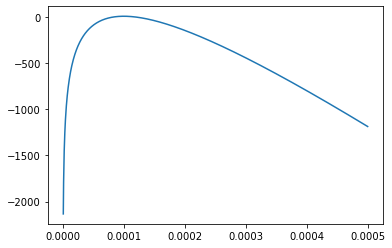

In [81]:
x = jnp.linspace(0, 5e-4, 1000)
p = gamma.logpdf(x, a=n_samples/2, scale = 2/n_samples * 1e-4) 
plt.plot(x, p)

In [ ]:
p

In [ ]:
p

In [101]:
# Instantiating model and optimizers
model = DeepmodBayes(features=[50, 50, 1])

params = model.init(network_key, X_train)
optimizer = optim.Adam(learning_rate=2e-3, beta1=0.99, beta2=0.99)
optimizer = optimizer.create(params)

In [102]:
# Compiling train step
update = create_update(loss_fn_mse_bayes_precalc, model=model, x=X_train, y=y_train)
_ = update(optimizer)  # triggering compilation

In [6]:
# Running to convergence
max_epochs = 20001
logger = Logger(comment='bayes_mse_precalc')
for epoch in jnp.arange(max_epochs):
    optimizer, metrics = update(optimizer)
    if epoch % 1000 == 0:
        print(f"Loss step {epoch}: {metrics['loss']}")
    if epoch % 100 == 0:
        logger.write(metrics, epoch)
logger.close()

NameError: name 'update' is not defined

In [12]:
# Instantiating model and optimizers
model = DeepmodBayes(features=[50, 50, 1])

params = model.init(network_key, X_train)
optimizer = optim.Adam(learning_rate=2e-3, beta1=0.99, beta2=0.99)
optimizer = optimizer.create(params)

In [13]:
# Compiling train step
update = create_update(loss_fn_pinn_bayes_full, model=model, x=X_train, y=y_train)
_ = update(optimizer)  # triggering compilation

In [14]:
# Running to convergence
max_epochs = 50001
logger = Logger(comment='precalc')
for epoch in jnp.arange(max_epochs):
    optimizer, metrics = update(optimizer)
    if epoch % 1000 == 0:
        print(f"Loss step {epoch}: {metrics['loss']}")
    if epoch % 100 == 0:
        logger.write(metrics, epoch)
logger.close()

Loss step 0: 664014.875
Loss step 1000: -11706.9248046875
Loss step 2000: -15791.791015625
Loss step 3000: -16156.58203125
Loss step 4000: -16177.9345703125
Loss step 5000: -16187.7900390625
Loss step 6000: -16187.6201171875
Loss step 7000: -16195.263671875
Loss step 8000: -16193.439453125
Loss step 9000: -16194.6875
Loss step 10000: -16194.677734375
Loss step 11000: -16199.6357421875
Loss step 12000: -16198.427734375
Loss step 13000: -16199.9423828125
Loss step 14000: -16196.31640625
Loss step 15000: -16197.87109375
Loss step 16000: -16201.3017578125
Loss step 17000: -16197.625
Loss step 18000: -16198.70703125
Loss step 19000: -16200.9921875
Loss step 20000: -16198.8388671875
Loss step 21000: -16201.427734375
Loss step 22000: -16201.6787109375
Loss step 23000: -16201.4794921875
Loss step 24000: -16199.3779296875
Loss step 25000: -16201.1435546875
Loss step 26000: -16202.154296875
Loss step 27000: -16202.8671875
Loss step 28000: -16199.453125
Loss step 29000: -16199.482421875
Loss step

In [9]:
# Instantiating model and optimizers
model = DeepmodBayes(features=[50, 50, 1])

params = model.init(network_key, X_train)
optimizer = optim.Adam(learning_rate=2e-3, beta1=0.99, beta2=0.99)
optimizer = optimizer.create(params)

In [10]:
# Compiling train step
update = create_update(loss_fn_pinn_bayes, model=model, x=X_train, y=y_train)
_ = update(optimizer)  # triggering compilation

In [11]:
# Running to convergence
max_epochs = 50001
logger = Logger(comment='opt')
for epoch in jnp.arange(max_epochs):
    optimizer, metrics = update(optimizer)
    if epoch % 1000 == 0:
        print(f"Loss step {epoch}: {metrics['loss']}")
    if epoch % 100 == 0:
        logger.write(metrics, epoch)
logger.close()

Loss step 0: 12277.25390625
Loss step 1000: 5890.10205078125
Loss step 2000: -87.94482421875
Loss step 3000: -5932.1767578125
Loss step 4000: -10796.4951171875
Loss step 5000: -12891.408203125
Loss step 6000: -12894.732421875
Loss step 7000: -12895.771484375
Loss step 8000: -12896.326171875
Loss step 9000: -12897.146484375
Loss step 10000: -12896.953125
Loss step 11000: -12897.4140625
Loss step 12000: -12897.69140625
Loss step 13000: -12897.4404296875
Loss step 14000: -12897.01171875
Loss step 15000: -12897.859375
Loss step 16000: -12898.0185546875
Loss step 17000: -12898.4501953125
Loss step 18000: -12898.59765625
Loss step 19000: -12898.212890625
Loss step 20000: -12898.232421875
Loss step 21000: -12898.546875
Loss step 22000: -12898.560546875
Loss step 23000: -12898.732421875
Loss step 24000: -12898.20703125
Loss step 25000: -12899.19140625
Loss step 26000: -12899.111328125
Loss step 27000: -12898.87890625
Loss step 28000: -12899.017578125
Loss step 29000: -12899.0126953125
Loss ste

KeyboardInterrupt: 

In [6]:
# Instantiating model and optimizers
model = DeepmodBayes(features=[50, 50, 1])

params = model.init(network_key, X_train)
optimizer = optim.Adam(learning_rate=2e-3, beta1=0.99, beta2=0.99)
optimizer = optimizer.create(params)

In [7]:
# Compiling train step
update = create_update(loss_fn_pinn_bayes_approximate, model=model, x=X_train, y=y_train)
_ = update(optimizer)  # triggering compilation

In [8]:
# Running to convergence
max_epochs = 20001
logger = Logger(comment='bayes_approx')
for epoch in jnp.arange(max_epochs):
    optimizer, metrics = update(optimizer)
    if epoch % 1000 == 0:
        print(f"Loss step {epoch}: {metrics['loss']}")
    if epoch % 100 == 0:
        logger.write(metrics, epoch)
logger.close()

Loss step 0: 2171.886962890625
Loss step 1000: -5671.0595703125
Loss step 2000: -5684.8388671875
Loss step 3000: -5687.47900390625
Loss step 4000: -5688.6123046875
Loss step 5000: -5688.79638671875
Loss step 6000: -5690.796875
Loss step 7000: -5691.8525390625
Loss step 8000: -5692.1611328125
Loss step 9000: -5691.193359375
Loss step 10000: -5693.21240234375
Loss step 11000: -5692.2431640625
Loss step 12000: -5692.1748046875
Loss step 13000: -5693.20166015625
Loss step 14000: -5693.39306640625
Loss step 15000: -5694.048828125
Loss step 16000: -5693.984375
Loss step 17000: -5694.12646484375
Loss step 18000: -5693.8603515625
Loss step 19000: -5694.3017578125
Loss step 20000: -5694.970703125
